# **Preprocessing Taks**



*   Mounted the drive


In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Install Liabraries



In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn



*   Import Libraries



In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt



### 1. Loading dataset from heart.csv and displaying information about data



In [ ]:
heart=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140.0,221,0,1,164.0,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141.0,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118.0,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159.0,0,0.0,2,0,2,1
1024,54,1,0,120.0,188,0,1,113.0,0,1.4,1,1,3,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1024 non-null   float64
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.2 KB


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1024.000000,1025.00000,1025.000000,1025.000000,1024.000000,1025.000000,1024.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611328,246.00000,0.149268,0.529756,149.140625,0.336585,1.069629,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.525273,51.59251,0.356527,0.527878,23.001333,0.472772,1.174079,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.shape

(1025, 14)


### 2.   Finding duplicates from data and droping them



In [ ]:
heart.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [ ]:
heart.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120.0,211,0,0,115.0,0,1.5,1,0,2,1
733,44,0,2,108.0,141,0,1,175.0,0,0.6,1,0,2,1
739,52,1,0,128.0,255,0,1,161.0,1,0.0,2,1,3,0
843,59,1,3,160.0,273,0,0,125.0,0,0.0,2,0,2,0


In [ ]:
heart.shape

(1025, 14)

### 3. Checking missing values in the dataset by first replacing ? with NaN values and then using the appropriate method to find missing values

In [ ]:
heart.replace('?',np.nan, inplace=True)

In [ ]:
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,0
fbs,0
restecg,0
thalach,1
exang,0
oldpeak,1


### 4. Drop null values (not full column) if there exists any

In [ ]:
heart = heart.dropna()
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart.shape

(1023, 14)

### 5. Divide the data in train and test split set with the ratio 80:20

In [ ]:
X = heart.drop('target', axis=1)
y = heart['target']

# Splitting the data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the results
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (818, 13)
Testing set shape: (205, 13)


### 6. Perform feature scaling if required

In [ ]:
heart = StandardScaler()

# Fitting the scaler on the training set and transforming the training set
X_train_scaled = heart.fit_transform(X_train)

# Using the same scaler to transform the test set
X_test_scaled = heart.transform(X_test)

# Converting scaled data back to DataFrame for convenience (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Displaying scaled data
print("Scaled Training set:\n", X_train_scaled.head())
print("Scaled Testing set:\n", X_test_scaled.head())

Scaled Training set:
         age       sex        cp  trestbps      chol       fbs   restecg  \
0 -1.481190  0.644379  0.043626 -1.244883 -0.212403 -0.418673  0.877086   
1 -0.257226  0.644379  1.972624 -0.786157 -1.146624 -0.418673 -1.010957   
2  0.410391 -1.551881  0.043626  0.245976  1.389117  2.388497 -1.010957   
3 -1.369921  0.644379  1.008125 -0.098068 -1.261018 -0.418673  0.877086   
4  1.856895 -1.551881  1.008125 -1.244883  0.359568  2.388497 -1.010957   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.173088 -0.705811 -0.927077  1.006460 -0.723750 -0.533725  
1  1.763938 -0.705811 -0.927077 -0.620584 -0.723750 -2.156725  
2  0.130092 -0.705811 -0.927077  1.006460  1.210981 -0.533725  
3  0.044100 -0.705811 -0.927077  1.006460 -0.723750 -0.533725  
4 -0.815819 -0.705811 -0.927077  1.006460  0.243615 -0.533725  
Scaled Testing set:
         age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.855469 -1.551881 -0.920872 -0.442113 -0.70

# **Algorithms**

### 1. Logistic Regression (for classification tasks)

Confusion Matrix:
[[89 11]
 [31 74]]


Confusion matrix, without normalization
[[89 11]
 [31 74]]


Accuracy: 0.7951219512195122


Precision: 0.7416666666666667


Recall: 0.89


F1-score: 0.8090909090909091


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       105
           1       0.74      0.89      0.81       100

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.79       205
weighted avg       0.81      0.80      0.79       205



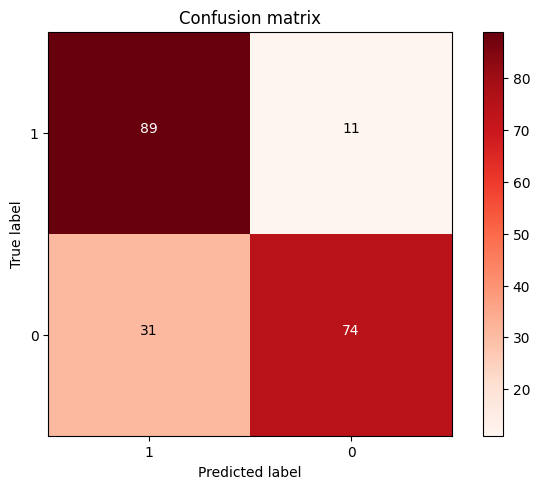

In [ ]:
# fitting model in training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# Making predictions on test data
yheart = LR.predict(X_test)

# Estimating probabilities for each class
yheart_prob = LR.predict_proba(X_test)

#_____________________________________________________________________________________________________________#

# plotting a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', normalize=False, cmap=plt.cm.Reds):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


print ("Confusion Matrix:")
print (confusion_matrix(y_test, yheart, labels=[1,0]))
print ('\n')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yheart, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

#_____________________________________________________________________________________________________________#

print ('\n')

# Displaying accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, yheart)
print ("Accuracy:", accuracy)
print ('\n')

# Displaying pricision
from sklearn.metrics import precision_score

precision = precision_score(y_test, yheart, pos_label=1)
print ("Precision:", precision)
print ('\n')

# Displaying recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, yheart, pos_label=1)
print ("Recall:", recall)
print ('\n')

# Displaying F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, yheart, pos_label=1)
print ("F1-score:", f1)
print ('\n')

#_____________________________________________________________________________________________________________#

# Displaying classification report
print ("Classification Report:")
print (classification_report(y_test, yheart))

## 2. Decision Trees

Confusion Matrix:
[[100   0]
 [  0 105]]


Confusion matrix, without normalization
[[100   0]
 [  0 105]]


Accuracy: 1.0


Precision: 1.0


Recall: 1.0


F1-score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       100

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



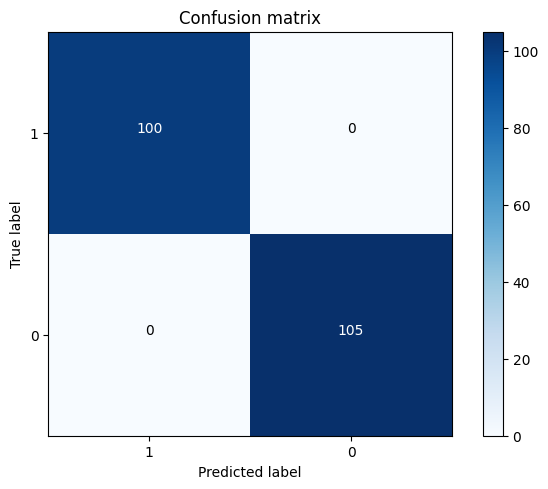

In [ ]:
# fitting model in training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import itertools

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Making predictions on test data
yheart = dt.predict(X_test)

# Estimating probabilities for each class
yheart_prob = dt.predict_proba(X_test)

#_____________________________________________________________________________________________________________#

# plotting a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', normalize=False, cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


print ("Confusion Matrix:")
print (confusion_matrix(y_test, yheart, labels=[1,0]))
print ('\n')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yheart, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

#_____________________________________________________________________________________________________________#

print ('\n')

# Displaying accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, yheart)
print ("Accuracy:", accuracy)
print ('\n')

# Displaying pricision
from sklearn.metrics import precision_score

precision = precision_score(y_test, yheart, pos_label=1)
print ("Precision:", precision)
print ('\n')

# Displaying recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, yheart, pos_label=1)
print ("Recall:", recall)
print ('\n')

# Displaying F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, yheart, pos_label=1)
print ("F1-score:", f1)
print ('\n')

#_____________________________________________________________________________________________________________#

# Displaying classification report
print ("Classification Report:")
print (classification_report(y_test, yheart))

### 3. K-Nearest Neighbors (KNN)

Confusion Matrix:
[[78 22]
 [26 79]]


Confusion matrix, without normalization
[[78 22]
 [26 79]]


Accuracy: 0.7658536585365854


Precision: 0.75


Recall: 0.78


F1-score: 0.7647058823529411


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.75      0.78      0.76       100

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.77      0.77      0.77       205



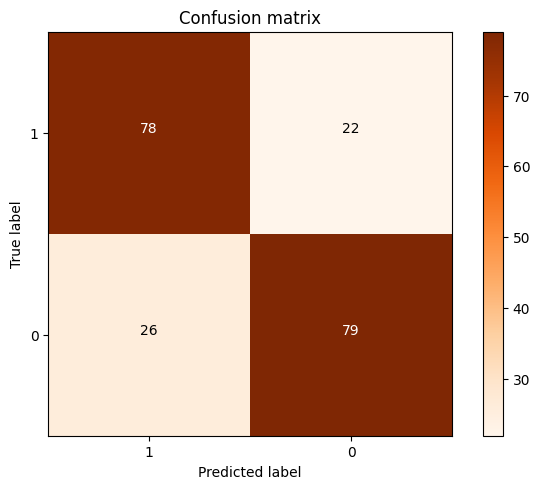

In [ ]:
# fitting model in training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import itertools

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

# Making predictions on test data
yheart = knn.predict(X_test)

# Estimating probabilities for each class
yheart_prob = knn.predict_proba(X_test)

#_____________________________________________________________________________________________________________#

# plotting a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', normalize=False, cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


print ("Confusion Matrix:")
print (confusion_matrix(y_test, yheart, labels=[1,0]))
print ('\n')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yheart, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

#_____________________________________________________________________________________________________________#

print ('\n')

# Displaying accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, yheart)
print ("Accuracy:", accuracy)
print ('\n')

# Displaying pricision
from sklearn.metrics import precision_score

precision = precision_score(y_test, yheart, pos_label=1)
print ("Precision:", precision)
print ('\n')

# Displaying recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, yheart, pos_label=1)
print ("Recall:", recall)
print ('\n')

# Displaying F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, yheart, pos_label=1)
print ("F1-score:", f1)
print ('\n')

#_____________________________________________________________________________________________________________#

# Displaying classification report
print ("Classification Report:")
print (classification_report(y_test, yheart))

### 4. Naive Bayes

Confusion Matrix:
[[87 13]
 [22 83]]


Confusion matrix, without normalization
[[87 13]
 [22 83]]


Accuracy: 0.8292682926829268


Precision: 0.7981651376146789


Recall: 0.87


F1-score: 0.8325358851674641


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       105
           1       0.80      0.87      0.83       100

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



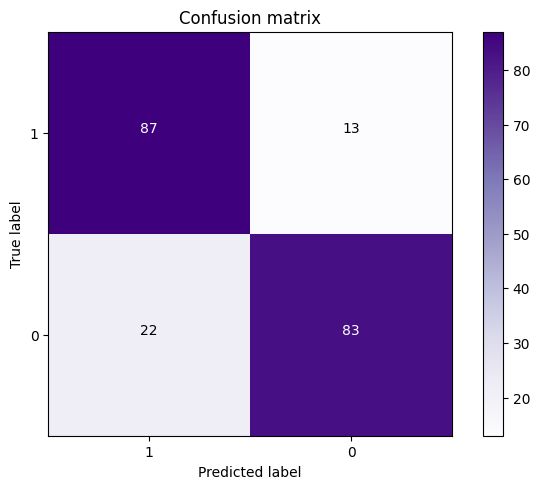

In [ ]:
# fitting model in training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import itertools

nb = GaussianNB().fit(X_train, y_train)

# Making predictions on test data
yheart = nb.predict(X_test)

# Estimating probabilities for each class
yheart_prob = nb.predict_proba(X_test)

#_____________________________________________________________________________________________________________#

# plotting a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', normalize=False, cmap=plt.cm.Purples):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


print ("Confusion Matrix:")
print (confusion_matrix(y_test, yheart, labels=[1,0]))
print ('\n')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yheart, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

#_____________________________________________________________________________________________________________#

print ('\n')

# Displaying accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, yheart)
print ("Accuracy:", accuracy)
print ('\n')

# Displaying pricision
from sklearn.metrics import precision_score

precision = precision_score(y_test, yheart, pos_label=1)
print ("Precision:", precision)
print ('\n')

# Displaying recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, yheart, pos_label=1)
print ("Recall:", recall)
print ('\n')

# Displaying F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, yheart, pos_label=1)
print ("F1-score:", f1)
print ('\n')

#_____________________________________________________________________________________________________________

# Displaying classification report
print ("Classification Report:")
print (classification_report(y_test, yheart))

# **Comparing result of models**

Decision Trees achieved the highest performance in terms of accuracy, precision, recall, and F1-score, all at 1.0.